# Mission Atlantic - CS SOMAR
## Plotting catch & effort ICCAT T2CE
### author: Henrique Amato Peres - ha.peres@usp.br
#### 24 February 2022

In [1]:
#! -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

Import gridded capture and effort:

In [2]:
df1 = np.genfromtxt('23fev22_eff.csv', delimiter=',')
df2 = np.genfromtxt('23fev22_cap.csv', delimiter=',')

df_eff = np.reshape(df1, (64, 2, 2, 59, 47))
df_cap = np.reshape(df2, (64, 2, 10, 59, 47))
del(df1, df2)

Attribute variables with effort in hours (h; for PS and BB) and in hooks (k; for LL), and catch of tunas major spp. (Tm), tunas small spp. (Ts), tunas other spp. (To), sharks major spp. (Sm) and sharks other spp. (So), according to gear (PS BB; LL) and effort (h; k), and from 2012 to 2019.

In [3]:
eff_h = np.nansum(df_eff[56:, :, 0, :, :], axis=(0,1))
eff_k = np.nansum(df_eff[56:, :, 1, :, :], axis=(0,1))
cap_Tmh = np.nansum(df_cap[56:, :, 0, :, :], axis=(0,1))
cap_Tmk = np.nansum(df_cap[56:, :, 1, :, :], axis=(0,1))
cap_Tsh = np.nansum(df_cap[56:, :, 2, :, :], axis=(0,1))
cap_Tsk = np.nansum(df_cap[56:, :, 3, :, :], axis=(0,1))
cap_Toh = np.nansum(df_cap[56:, :, 4, :, :], axis=(0,1))
cap_Tok = np.nansum(df_cap[56:, :, 5, :, :], axis=(0,1))
cap_Smh = np.nansum(df_cap[56:, :, 6, :, :], axis=(0,1))
cap_Smk = np.nansum(df_cap[56:, :, 7, :, :], axis=(0,1))
cap_Soh = np.nansum(df_cap[56:, :, 8, :, :], axis=(0,1))
cap_Sok = np.nansum(df_cap[56:, :, 9, :, :], axis=(0,1))

In [4]:
import cartopy.crs as ccrs
proj = ccrs.PlateCarree()
import cartopy.feature as cfeature
LAND = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='0.7')
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

In [5]:
### Grid 1x1 to plot
Lon = np.arange(-46, 13, 1)
Lat = np.arange(-31, 16, 1)

### Catch, effort and CPUE for PS and BB (hours)
Below, figures with catch, effort and CPUE of all tuna and shark spp. for PS and BB gears, with effort in fishing hours/km², between 2012 and 2019, in log-scale.

/tmp/ipykernel_9805/194317162.py:3: RuntimeWarning: invalid value encountered in true_divide
  data3 = data1 / data2
/home/henrique/.local/lib/python3.8/site-packages/matplotlib/colors.py:1543: RuntimeWarning: invalid value encountered in less_equal
  super().autoscale_None(np.ma.array(A, mask=(A <= 0)))


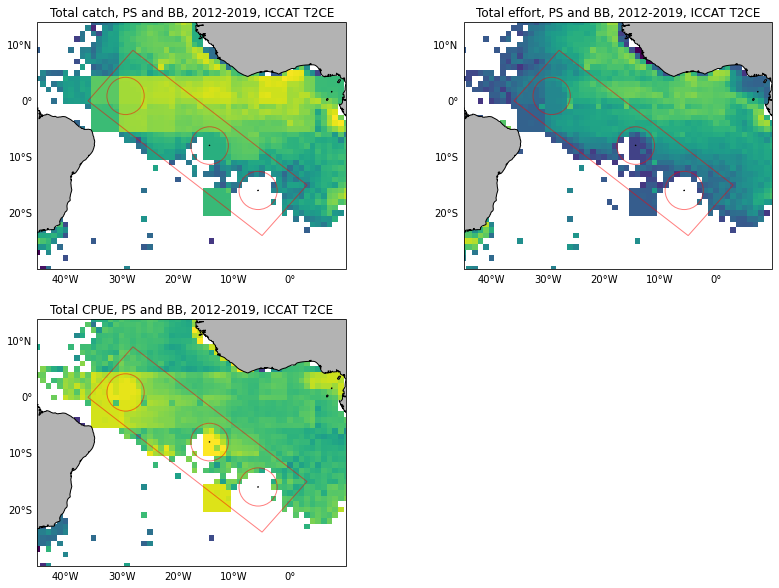

In [6]:
data1 = cap_Tmh + cap_Tsh + cap_Toh + cap_Smh + cap_Soh
data2 = eff_h
data3 = data1 / data2
data1[data1==0] = np.nan
data2[data2==0] = np.nan
data3[data3==0] = np.nan

fig, axs = plt.subplots(2, 2, figsize=(14,10), subplot_kw=dict(projection=proj))

def plota(ax, data, tit):
    gl = ax.gridlines(alpha=0, draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_extent([-45, 10, -30, 14], crs=proj)
    cm = ax.pcolormesh(Lon, Lat, data.T, norm=mcolors.LogNorm())
    ax.add_feature(LAND)
    poly_verts = [(-36,0), (-28,9), (3,-15), (-5,-24)]  # SOMAR polygon
    patch_somar = mpatches.Polygon(poly_verts, ec='r', fc='None', alpha=.5)
    eez_spsp = mpatches.Circle([-29.31, 0.87], radius=3.32, ec='r', fc='None', alpha=.5)
    eez_ai = mpatches.Circle([-14.35, -7.97], radius=3.35, ec='r', fc='None', alpha=.5)
    eez_sh = mpatches.Circle([-5.71, -15.96], radius=3.4, ec='r', fc='None', alpha=.5)
    ax.add_patch(patch_somar)
    ax.add_patch(eez_spsp)
    ax.add_patch(eez_ai)
    ax.add_patch(eez_sh)
    ax.set_title(tit)
    #cb = plt.colorbar(cm, ax=ax, shrink=0.6)

plt.delaxes(axs[1,1])
plota(axs[0,0], data1, 'Total catch, PS and BB, 2012-2019, ICCAT T2CE')
plota(axs[0,1], data2, 'Total effort, PS and BB, 2012-2019, ICCAT T2CE')
plota(axs[1,0], data3, 'Total CPUE, PS and BB, 2012-2019, ICCAT T2CE')

#cb = plt.colorbar(cm, ax=ax, shrink=0.6)
#cb.set_label('Fishing hours / km²')
#ax.set_title('Fishing effort, PS and BB, ICCAT T2CE 2012-2019')

### Catch, effort and CPUE for LL (hooks)
Below, figures with catch, effort and CPUE of all tuna and shark spp. for LL gears, with effort in number of hooks/km², between 2012 and 2019, in log-scale.

/tmp/ipykernel_9805/4229773882.py:3: RuntimeWarning: invalid value encountered in true_divide
  data3 = data1 / data2


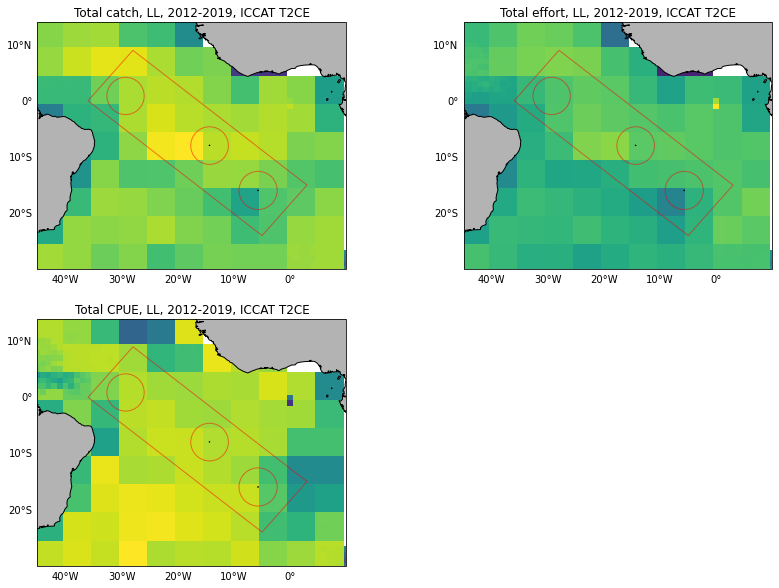

In [7]:
data1 = cap_Tmk + cap_Tsk + cap_Tok + cap_Smk + cap_Sok
data2 = eff_k
data3 = data1 / data2
data1[data1==0] = np.nan
data2[data2==0] = np.nan
data3[data3==0] = np.nan

fig, axs = plt.subplots(2, 2, figsize=(14,10), subplot_kw=dict(projection=proj))

def plota(ax, data, tit):
    gl = ax.gridlines(alpha=0, draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_extent([-45, 10, -30, 14], crs=proj)
    cm = ax.pcolormesh(Lon, Lat, data.T, norm=mcolors.LogNorm())
    ax.add_feature(LAND)
    poly_verts = [(-36,0), (-28,9), (3,-15), (-5,-24)]  # SOMAR polygon
    patch_somar = mpatches.Polygon(poly_verts, ec='r', fc='None', alpha=.5)
    eez_spsp = mpatches.Circle([-29.31, 0.87], radius=3.32, ec='r', fc='None', alpha=.5)
    eez_ai = mpatches.Circle([-14.35, -7.97], radius=3.35, ec='r', fc='None', alpha=.5)
    eez_sh = mpatches.Circle([-5.71, -15.96], radius=3.4, ec='r', fc='None', alpha=.5)
    ax.add_patch(patch_somar)
    ax.add_patch(eez_spsp)
    ax.add_patch(eez_ai)
    ax.add_patch(eez_sh)
    ax.set_title(tit)
    #cb = plt.colorbar(cm, ax=ax, shrink=0.6)

plt.delaxes(axs[1,1])
plota(axs[0,0], data1, 'Total catch, LL, 2012-2019, ICCAT T2CE')
plota(axs[0,1], data2, 'Total effort, LL, 2012-2019, ICCAT T2CE')
plota(axs[1,0], data3, 'Total CPUE, LL, 2012-2019, ICCAT T2CE')

### Polygon #1
Based on CPUE for PS and BB gears, we drew a polygon in St. Peter and St. Paul Archipelago region, with vertices in the following Lon Lat coordinates: (-36, 0), (-32, 4.5), (-26.5, 4.5), (-26.5, -5.5), (-29, -5.5).

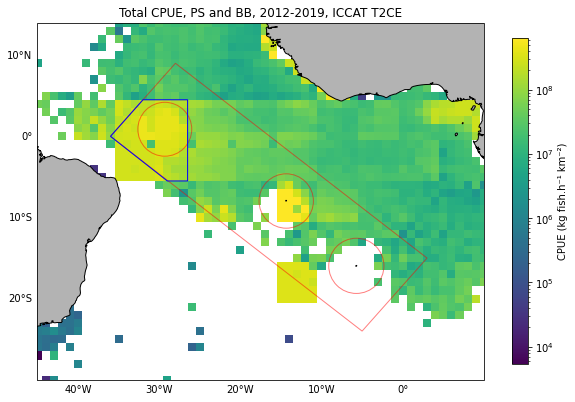

In [8]:
data1 = cap_Tmh + cap_Tsh + cap_Toh + cap_Smh + cap_Soh
data2 = eff_h
data3 = data1 / data2
data1[data1==0] = np.nan
data2[data2==0] = np.nan
data3[data3==0] = np.nan

fig, ax = plt.subplots(1, 1, figsize=(10,10), subplot_kw=dict(projection=proj))

def plota(ax, data):
    gl = ax.gridlines(alpha=0, draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_extent([-45, 10, -30, 14], crs=proj)
    cm = ax.pcolormesh(Lon, Lat, data.T, norm=mcolors.LogNorm())
    ax.add_feature(LAND)
    poly_verts = [(-36,0), (-28,9), (3,-15), (-5,-24)]  # SOMAR polygon
    patch_somar = mpatches.Polygon(poly_verts, ec='r', fc='None', alpha=.5)
    eez_spsp = mpatches.Circle([-29.31, 0.87], radius=3.32, ec='r', fc='None', alpha=.5)
    eez_ai = mpatches.Circle([-14.35, -7.97], radius=3.35, ec='r', fc='None', alpha=.5)
    eez_sh = mpatches.Circle([-5.71, -15.96], radius=3.4, ec='r', fc='None', alpha=.5)
    poly_PSBB = mpatches.Polygon([(-36,0), (-32, 4.5), (-26.5, 4.5), (-26.5, -5.5), (-29,-5.5)], 
                                ec='b', fc='None')
    ax.add_patch(patch_somar)
    ax.add_patch(eez_spsp)
    ax.add_patch(eez_ai)
    ax.add_patch(eez_sh)
    ax.add_patch(poly_PSBB)
    ax.set_title('Total CPUE, PS and BB, 2012-2019, ICCAT T2CE')
    cb = plt.colorbar(cm, ax=ax, shrink=0.6)
    cb.set_label('CPUE (kg fish.h⁻¹ km⁻²)')

plota(ax, data3)

### Polygon #2
Based on effort for PS and BB gears, we drew a polygon east of the St. Peter and St. Paul Archipelago, with vertices in the following Lon Lat coordinates: (-26, 4.5), (-22.5, 4.5), (-14.5, -1.5), (-26, -1.5). This area is a PS and BB fishing hotspot confirmed by Global Fishing Watch database.

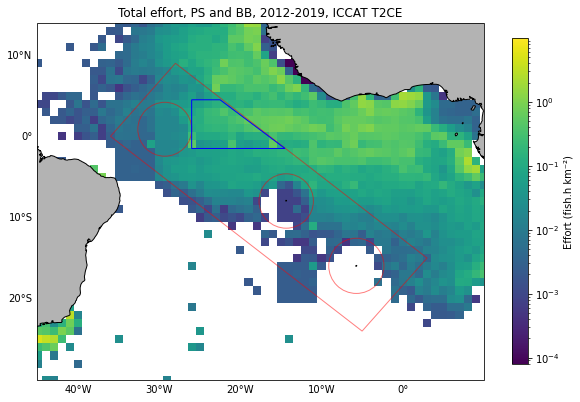

In [9]:
data1 = cap_Tmh + cap_Tsh + cap_Toh + cap_Smh + cap_Soh
data2 = eff_h
data3 = data1 / data2
data1[data1==0] = np.nan
data2[data2==0] = np.nan
data3[data3==0] = np.nan

fig, ax = plt.subplots(1, 1, figsize=(10,10), subplot_kw=dict(projection=proj))

def plota(ax, data):
    gl = ax.gridlines(alpha=0, draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_extent([-45, 10, -30, 14], crs=proj)
    cm = ax.pcolormesh(Lon, Lat, data.T, norm=mcolors.LogNorm())
    ax.add_feature(LAND)
    poly_verts = [(-36,0), (-28,9), (3,-15), (-5,-24)]  # SOMAR polygon
    patch_somar = mpatches.Polygon(poly_verts, ec='r', fc='None', alpha=.5)
    eez_spsp = mpatches.Circle([-29.31, 0.87], radius=3.32, ec='r', fc='None', alpha=.5)
    eez_ai = mpatches.Circle([-14.35, -7.97], radius=3.35, ec='r', fc='None', alpha=.5)
    eez_sh = mpatches.Circle([-5.71, -15.96], radius=3.4, ec='r', fc='None', alpha=.5)
    poly_PSBB = mpatches.Polygon([(-26, 4.5), (-22.5,4.5), (-14.5,-1.5), (-26,-1.5)], 
                                ec='b', fc='None')
    ax.add_patch(patch_somar)
    ax.add_patch(eez_spsp)
    ax.add_patch(eez_ai)
    ax.add_patch(eez_sh)
    ax.add_patch(poly_PSBB)
    ax.set_title('Total effort, PS and BB, 2012-2019, ICCAT T2CE')
    cb = plt.colorbar(cm, ax=ax, shrink=0.6)
    cb.set_label('Effort (fish.h km⁻²)')

plota(ax, data2)

### Polygon #3
Based on effort for LL gears, we drew a polygon west of the Ascension Island, with vertices in the following Lon Lat coordinates: (-25.5, -5.5), (-17.7, -5.5), (-17.7, -10.5), (-22.5, -10.5), (-25.5, -8). This area is a major LL fishing hotspot confirmed by Global Fishing Watch database.

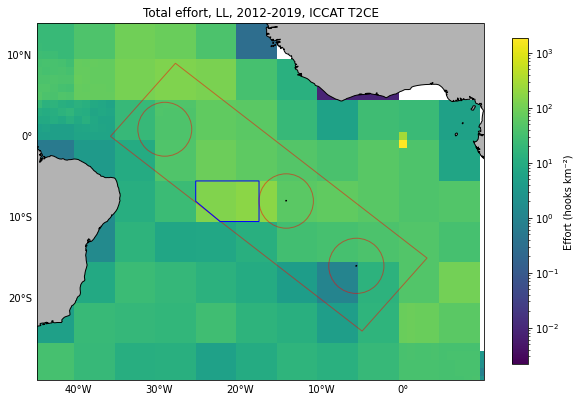

In [10]:
data1 = cap_Tmk + cap_Tsk + cap_Tok + cap_Smk + cap_Sok
data2 = eff_k
data3 = data1 / data2
data1[data1==0] = np.nan
data2[data2==0] = np.nan
data3[data3==0] = np.nan

fig, ax = plt.subplots(1, 1, figsize=(10,10), subplot_kw=dict(projection=proj))

def plota(ax, data):
    gl = ax.gridlines(alpha=0, draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_extent([-45, 10, -30, 14], crs=proj)
    cm = ax.pcolormesh(Lon, Lat, data.T, norm=mcolors.LogNorm())
    ax.add_feature(LAND)
    poly_verts = [(-36,0), (-28,9), (3,-15), (-5,-24)]  # SOMAR polygon
    patch_somar = mpatches.Polygon(poly_verts, ec='r', fc='None', alpha=.5)
    eez_spsp = mpatches.Circle([-29.31, 0.87], radius=3.32, ec='r', fc='None', alpha=.5)
    eez_ai = mpatches.Circle([-14.35, -7.97], radius=3.35, ec='r', fc='None', alpha=.5)
    eez_sh = mpatches.Circle([-5.71, -15.96], radius=3.4, ec='r', fc='None', alpha=.5)
    poly_LL = mpatches.Polygon([(-25.5, -5.5), (-17.7, -5.5), (-17.7,-10.5), (-22.5,-10.5), (-25.5,-8)], 
                                ec='b', fc='None')
    ax.add_patch(patch_somar)
    ax.add_patch(eez_spsp)
    ax.add_patch(eez_ai)
    ax.add_patch(eez_sh)
    ax.add_patch(poly_LL)
    ax.set_title('Total effort, LL, 2012-2019, ICCAT T2CE')
    cb = plt.colorbar(cm, ax=ax, shrink=0.6)
    cb.set_label('Effort (hooks km⁻²)')
    
plota(ax, data2)